In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import seaborn as sns

In [11]:
df = pd.read_csv(r"C:\Users\ateso\Desktop\Flash\orders.csv")

In [12]:
df.head()

,33557880,2019-03-10 23:59:59.000000,AR,14200,DeliveredStatus,PAID,1,4.54,8.64
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96


In [13]:
new_orders = pd.DataFrame()

new_orders['order_id'] = df['33557880']
new_orders['activation_time_local'] = df['2019-03-10 23:59:59.000000']
new_orders['country_code'] = df['AR']
new_orders['store_address'] = df['14200']
new_orders['final_status'] = df['DeliveredStatus']
new_orders['payment_status'] = df['PAID']
new_orders['products'] = df['1']
new_orders['products_total'] = df['4.54']
new_orders['purchase_total_price'] = df['8.64']

In [14]:
new_orders.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96


In [20]:
def authorized_order(products_total,purchase_total_price):
    if products_total<purchase_total_price:
        return 0
    elif products_total>=purchase_total_price:
        return 1

In [24]:
new_orders["authorized"] = new_orders.apply(lambda row: authorized_order(row["products_total"], row["purchase_total_price"]), axis=1)
new_orders.head()

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,authorized
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,1
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,1
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,1
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,0
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,0


In [38]:
def incremental(products_total,purchase_total_price):
    if (products_total*1.2) < purchase_total_price:
        return 0
    elif (products_total*1.2)>=purchase_total_price:
        return 1

In [39]:
new_orders["incremetal"] = new_orders.apply(lambda row: incremental(row["products_total"], row["purchase_total_price"]), axis=1)
new_orders

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,authorized,country_name,incremetal
0,33512615,2019-03-10 23:58:32.000000,TR,28725,DeliveredStatus,PAID,1,3.76,3.76,1,Turkey,1
1,33512451,2019-03-10 23:57:56.000000,TR,28725,DeliveredStatus,PAID,1,2.86,2.86,1,Turkey,1
2,33530892,2019-03-10 23:57:33.000000,ES,19777,CanceledStatus,PAID,1,12.95,0.00,1,Spain,1
3,33557765,2019-03-10 23:57:21.000000,AR,34565,DeliveredStatus,PAID,2,2.86,6.48,0,Argentina,0
4,33512273,2019-03-10 23:57:13.000000,TR,63536,DeliveredStatus,PAID,4,1.88,1.96,0,Turkey,1
...,...,...,...,...,...,...,...,...,...,...,...,...
60394,31960607,2019-03-01 00:04:31.000000,TR,68820,DeliveredStatus,PAID,2,10.17,10.33,0,Turkey,1
60395,32002079,2019-03-01 00:03:53.000000,AR,50175,CanceledStatus,PAID,1,3.80,0.00,1,Argentina,1
60396,32002046,2019-03-01 00:03:06.000000,AR,55159,DeliveredStatus,PAID,1,4.24,4.91,0,Argentina,1
60397,32001950,2019-03-01 00:01:01.000000,AR,62504,CanceledStatus,PAID,1,4.91,0.00,1,Argentina,1


In [41]:
new_orders["country_code"].unique()


array(['TR', 'ES', 'AR', 'EG', 'RO', 'FR', 'PA', 'PE', 'IT', 'GT', 'MA',
       'EC', 'PT', 'CL', 'GE', 'UA', 'CR', 'UY', 'DO', 'PR', 'KE', 'CI',
       'BR'], dtype=object)

In [42]:
country_code_mapping = {
    'TR': 'Turkey',
    'ES': 'Spain',
    'AR': 'Argentina',
    'EG': 'Egypt',
    'RO': 'Romania',
    'FR': 'France',
    'PA': 'Panama',
    'PE': 'Peru',
    'IT': 'Italy',
    'GT': 'Guatemala',
    'MA': 'Morocco',
    'EC': 'Ecuador',
    'PT': 'Portugal',
    'CL': 'Chile',
    'GE': 'Georgia',
    'UA': 'Ukraine',
    'CR': 'Costa Rica',
    'UY': 'Uruguay',
    'DO': 'Dominican Republic',
    'PR': 'Puerto Rico',
    'KE': 'Kenya',
    'CI': 'Côte d\'Ivoire',
    'BR': 'Brazil'
}

new_orders['country_name'] = new_orders['country_code'].map(country_code_mapping)

In [47]:
new_orders.sample(1)

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,authorized,country_name,incremetal
53457,32232292,2019-03-02 11:37:06.000000,PE,11694,DeliveredStatus,PAID,1,3.46,7.99,0,Peru,0


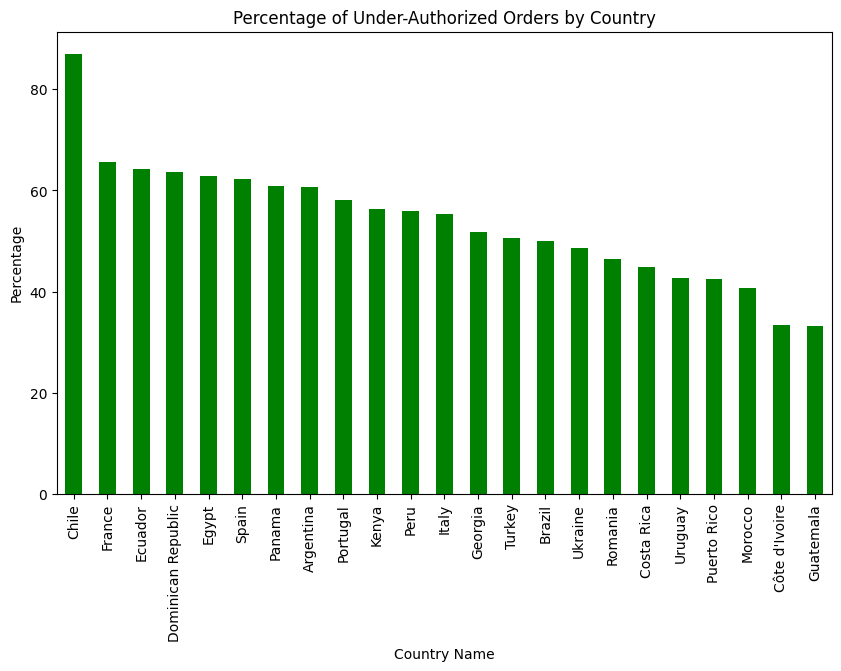

In [56]:
new_orders['authorized'] = 'Correctly Authorized'
new_orders.loc[new_orders['products_total'] < new_orders['purchase_total_price'], 'authorized'] = 'Under-Authorized'

country_authorization_percentage = new_orders.groupby('country_name')['authorized'].value_counts(normalize=True).unstack(fill_value=0) * 100

sorted_country_authorization = country_authorization_percentage.sort_values(by='Under-Authorized', ascending=False)

plt.figure(figsize=(10, 6))
sorted_country_authorization['Under-Authorized'].plot(kind='bar', color='green')
plt.title('Percentage of Under-Authorized Orders by Country')
plt.xlabel('Country Name')
plt.ylabel('Percentage')
plt.show()


KeyError: 'Column not found: authorization_status'

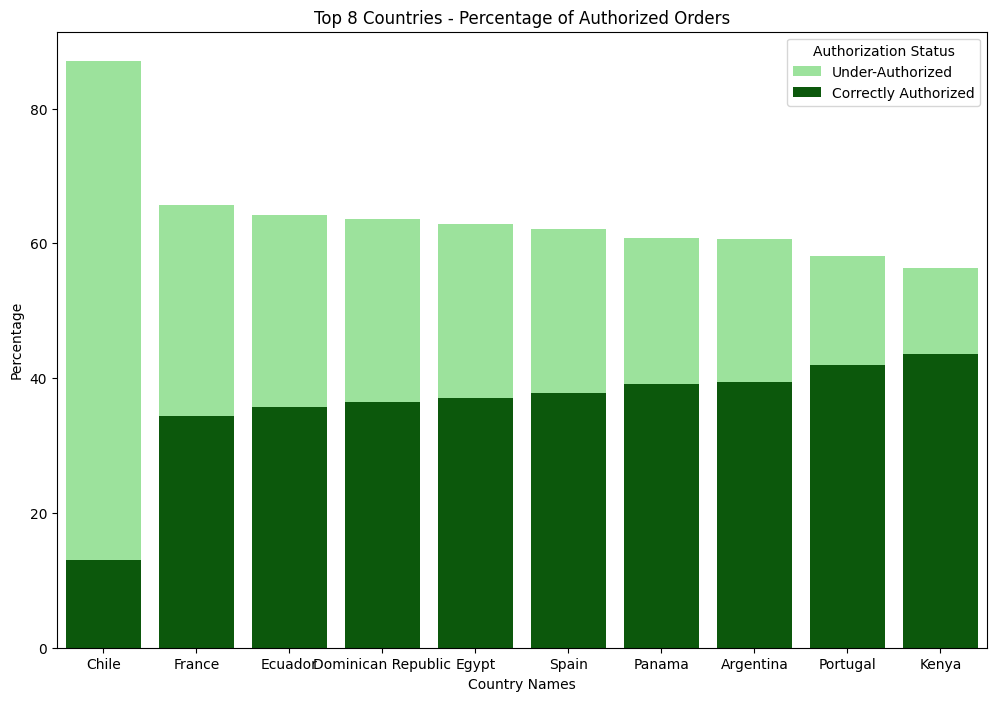

In [68]:
top_8_countries = sorted_country_authorization.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(data=top_8_countries, x=top_8_countries.index, y='Under-Authorized', color='lightgreen', label='Under-Authorized')

sns.barplot(data=top_8_countries, x=top_8_countries.index, y='Correctly Authorized', color='darkgreen', label='Correctly Authorized')

plt.title("Top 8 Countries - Percentage of Authorized Orders")
plt.xlabel("Country Names")
plt.ylabel("Percentage")
plt.legend(title="Authorization Status");

In [73]:
new_orders['remaining_amount'] = new_orders['purchase_total_price'] - new_orders['products_total']

under_authorized_orders = new_orders[new_orders['authorized'] == 'Under-Authorized']

remaining_amount = under_authorized_orders['remaining_amount'].sum()

remaining_amount

129469.82999999999

In [76]:

new_orders['authorized'] = 'Correctly Authorized'
new_orders.loc[new_orders['products_total'] < new_orders['purchase_total_price'], 'authorized'] = 'Under-Authorized'

store_summary = new_orders.groupby('store_address').agg({
    'order_id': 'count',
    'purchase_total_price': 'sum'
}).reset_index()

most_problematic_stores = store_summary.sort_values(by=['order_id', 'purchase_total_price'], ascending=[False, False])

most_problematic_stores.head()

,store_address,order_id,purchase_total_price
1381,28671,492,4714.97
701,12513,276,5307.10
792,14455,252,3514.33
1382,28675,248,1897.16
1387,28712,242,3781.39


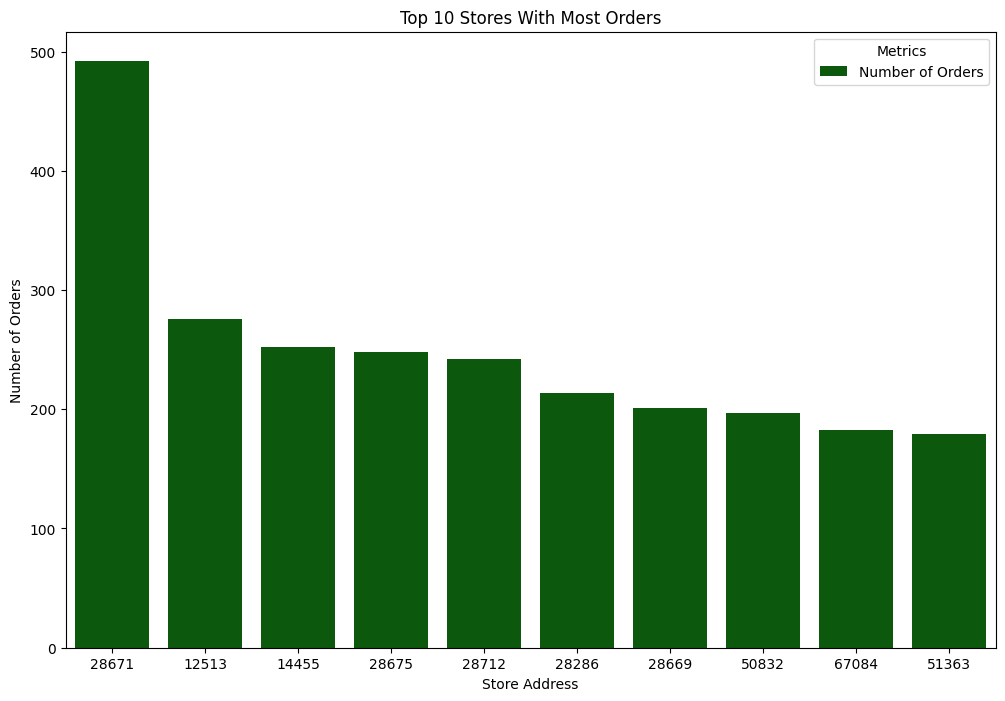

In [100]:
top_10_stores = most_problematic_stores.head(10).sort_values(by='order_id', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_stores['store_address'], y=top_10_stores['order_id'], color='darkgreen', label='Number of Orders', order=top_10_stores['store_address'])

plt.title('Top 10 Stores With Most Orders')
plt.xlabel('Store Address')
plt.ylabel('Number of Orders')
plt.legend(title='Metrics')



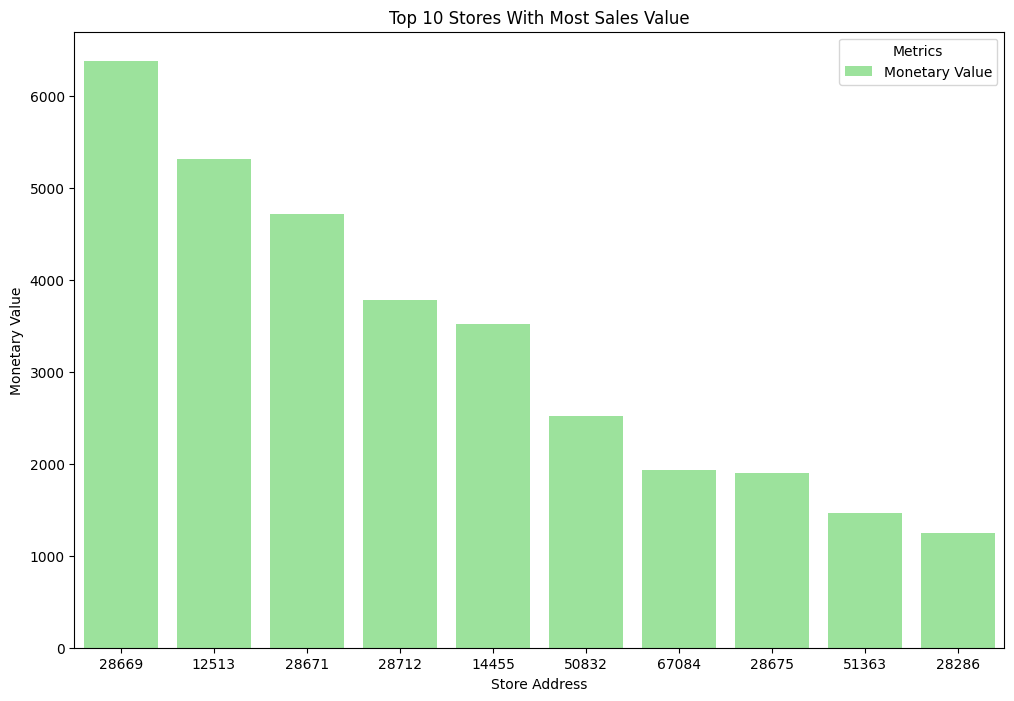

In [101]:
top_10_stores = most_problematic_stores.head(10).sort_values(by='purchase_total_price', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_stores['store_address'], y=top_10_stores['purchase_total_price'], color='lightgreen', label='Monetary Value', order=top_10_stores['store_address'])

plt.title('Top 10 Stores With Most Sales Value')
plt.xlabel('Store Address')
plt.ylabel('Monetary Value')
plt.legend(title='Metrics');

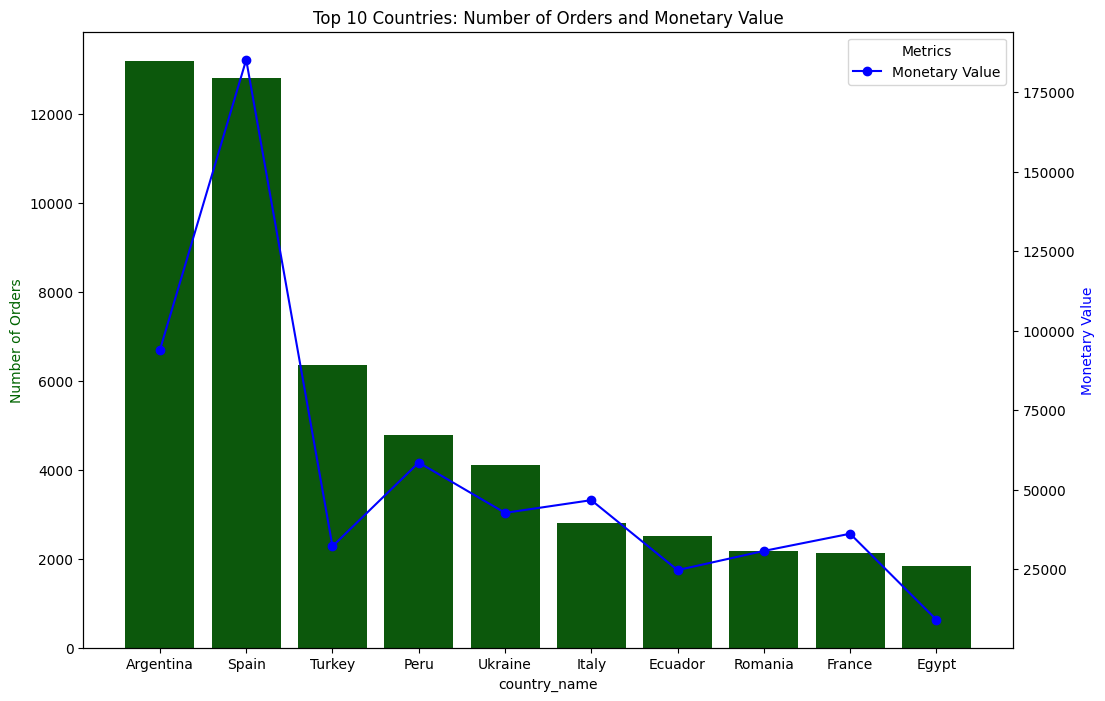

In [99]:
country_summary = new_orders.groupby('country_name').agg({
    'order_id': 'count',
    'purchase_total_price': 'sum'
}).reset_index()

sorted_country_summary = country_summary.sort_values(by='order_id', ascending=False)

top_10_countries = sorted_country_summary.head(10)

plt.figure(figsize=(12, 8))


ax = sns.barplot(x=top_10_countries['country_name'], y=top_10_countries['order_id'], color='darkgreen')


ax2 = ax.twinx()
ax2.plot(top_10_countries['country_name'], top_10_countries['purchase_total_price'], color='blue', marker='o', label='Monetary Value')

ax.set_ylabel('Number of Orders', color='darkgreen')
ax2.set_ylabel('Monetary Value', color='blue')
plt.title('Top 10 Countries: Number of Orders and Monetary Value')
plt.xlabel('Country Name')

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right', title='Metrics')



In [105]:
new_orders.sample(6)

,order_id,activation_time_local,country_code,store_address,final_status,payment_status,products,products_total,purchase_total_price,authorized,country_name,incremetal,remaining_amount
47769,32308653,2019-03-02 23:07:52.000000,MA,34510,CanceledStatus,PAID,1,23.00,0.00,Correctly Authorized,Morocco,1,-23.00
7075,33383107,2019-03-09 23:04:42.000000,PE,11694,DeliveredStatus,PAID,2,4.84,5.64,Under-Authorized,Peru,1,0.80
33098,32680725,2019-03-05 18:18:22.000000,TR,46176,DeliveredStatus,PAID,1,5.58,10.25,Under-Authorized,Turkey,0,4.67
36717,32604876,2019-03-04 21:27:59.000000,ES,49067,DeliveredStatus,PAID,1,6.95,6.95,Correctly Authorized,Spain,1,0.00
37650,32585729,2019-03-04 19:56:50.000000,ES,21625,DeliveredStatus,PAID,1,4.30,5.10,Under-Authorized,Spain,1,0.80
16824,33101060,2019-03-08 18:12:42.000000,ES,20116,DeliveredStatus,PAID,9,12.71,12.15,Correctly Authorized,Spain,1,-0.56


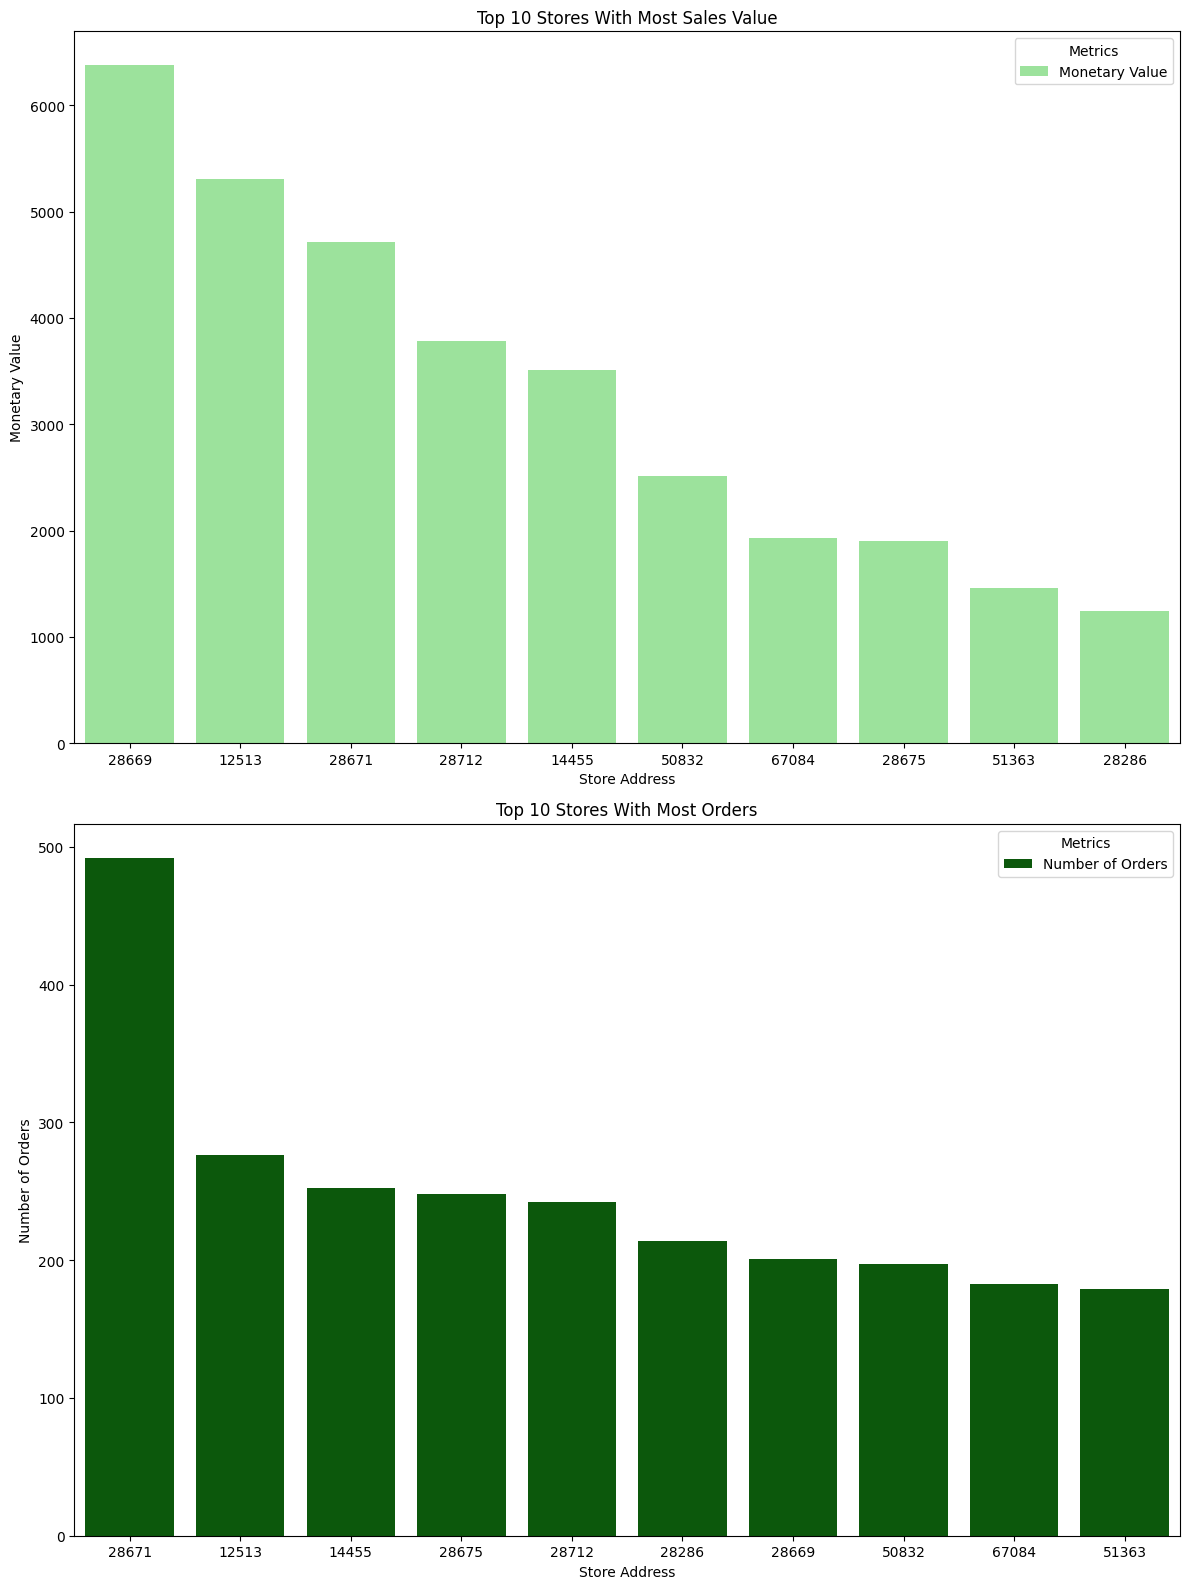

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'most_problematic_stores' is your DataFrame
top_10_stores_sales = most_problematic_stores.head(10).sort_values(by='purchase_total_price', ascending=False)
top_10_stores_orders = most_problematic_stores.head(10).sort_values(by='order_id', ascending=False)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot the top 10 stores by sales
sns.barplot(x=top_10_stores_sales['store_address'], y=top_10_stores_sales['purchase_total_price'],
            color='lightgreen', label='Monetary Value', order=top_10_stores_sales['store_address'], ax=ax1)

ax1.set_title('Top 10 Stores With Most Sales Value')
ax1.set_xlabel('Store Address')
ax1.set_ylabel('Monetary Value')
ax1.legend(title='Metrics')

# Plot the top 10 stores by number of orders
sns.barplot(x=top_10_stores_orders['store_address'], y=top_10_stores_orders['order_id'],
            color='darkgreen', label='Number of Orders', order=top_10_stores_orders['store_address'], ax=ax2)

ax2.set_title('Top 10 Stores With Most Orders')
ax2.set_xlabel('Store Address')
ax2.set_ylabel('Number of Orders')
ax2.legend(title='Metrics')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined plot
plt.show()


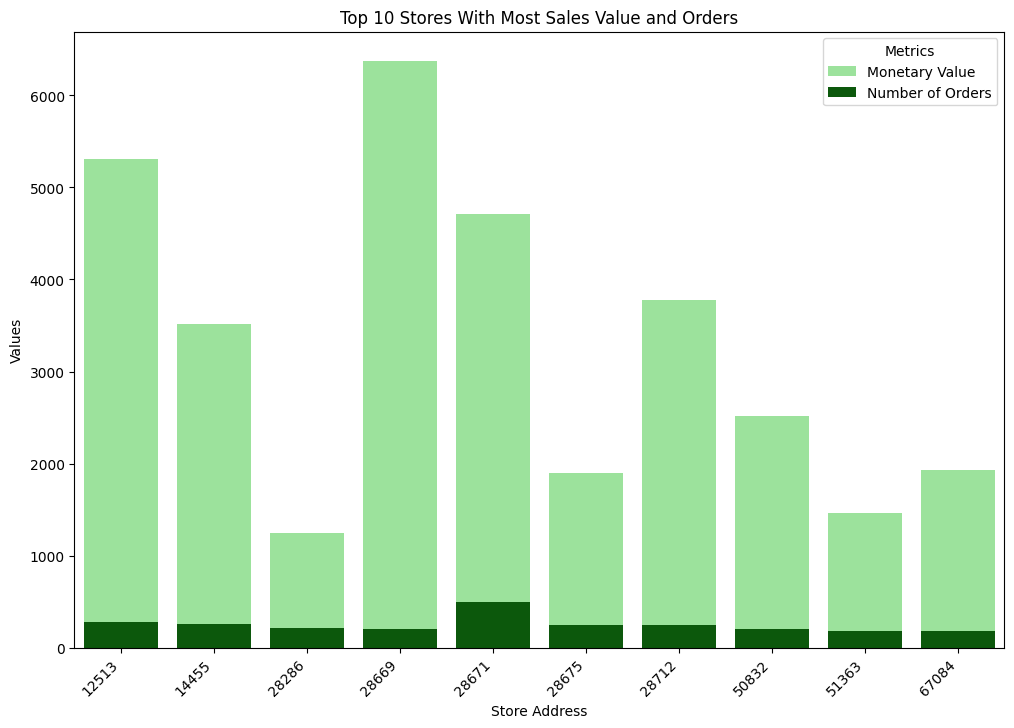